# Time Series Analysis in Python

- Time series analysis deals with data that is ordered in time.
- Financial ts: stocks, bonds.
- Goals of the course:
   * Learn about ts models
   * Use the relevant statistical packages in python.
   * Concrete examples of how this models are used.

- Some useful pandas tools
   * df.index = pd.datetime(df.index) /pd.to_datetime
   * df1.join(df2)
   * df = df.resample(rule='W').last()  # resampling data from daily to weekly
   * df['ABC'].corr(df['XYZ'])
   * df['ABC'].autocorr()



## Correlation of Two time Series


- The correlation coefficient is a measure of how much two series vary together. 
- A correlation of one means that the two series have a perfect linear relationship with no deviations.
- High correlations mean that the two series strongly vary together.
- A low correlation means they vary together, but there is a weak association. - A high negative correlation means they vary in opposite directions, but still with a linear relationship.

- Check the correlation of their returns.
- First step:
  
  * Compute percentage change of both series - this gives the returns
     - df['SPX_Ret']= df['SPX_Prices'].pct_change()
     - df['R2000_Ret] = df['R2000_prices].pct_change()
  * Check correlation using a scatter plot
     - plt.scatter()   
   


### Simple Linear Regression

- In statsmodels 
     * import statsmodels.api as sm
     * sm.OLS(y,x).fit()
- In numpy:
      * np.polyfit(x,y,deg=1)
- In pandas:
     * pd.ols(y,x)
- In scipy:
      * from scipy import stats
      * stats.linregress(x,y)

- Rsquared measures how well the linear regression line fits the data.
- 

### Autocorrelation

- Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation".
- With financial time series, when returns have a negative autocorrelation, we say it is "mean reverting".
- if a series has positive autocorrelation, we say it is "trend-following".
- Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. 
- Since stocks have historically had negative autocorrelation over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up. 
- For other assets like commodities and currencies, they have historically had positive autocorrelation over horizons of several months, so the typical hedge fund strategy there is to buy commodities that have gone up in the last several months and sell those commodities that have gone down.

### Autocorrelation Function

- Any significant non-zero autocorrelations implies that the series can be forecast from the past.
- The ACF can also be useful for selecting a parsimonious model for fitting the data. 
- plot_acf is the statsmodels function for plotting the autocorrelation function. 
     * plot_acf(x,lags =20, alpha=0.05)
     * The argument lags indicates how many lags of the autocorrelation function will be plotted. 
     * The alpha argument sets the width of the confidence interval.
     * If alpha equals 0-point-05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. 
     



### White Noise

- White noise is a series with:
   * Constant Mean
   * Constant variance
   * Zero autocorrelations at all lags.
- Special case:
   * Data is white noise and normally distributed , then it is a Gaussian White Noise.
   

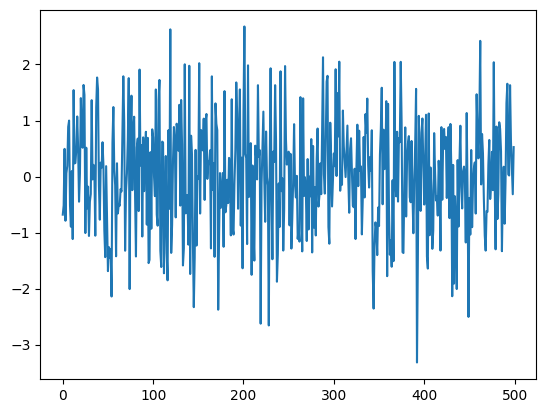

In [1]:
# Simulating white noise
import numpy as np
import matplotlib.pyplot as plt

noise = np.random.normal(loc=0,scale=1, size=500) #loc is mean, scale is stddev
plt.plot(noise)


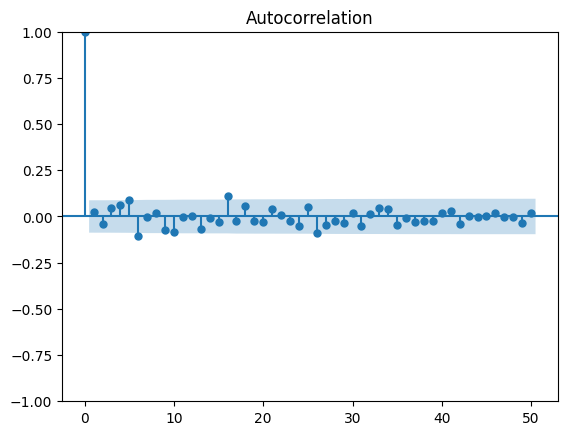

In [2]:
# Autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(noise,lags=50)
plt.show()

- The returns on the stock market are pretty close to a white noise process.
- Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

### Random Walk

- Today's price is equal to yesterday's price plus some noise.
- The change in price of a random walk is just White Noise. 
- The bottom line is that if stock *prices* follow a random walk, then stock *returns* are White Noise
- You can't forecast a random walk. The best guess for tomorrow's price is simply today's price.



- To test whether a series like stock prices follows a random walk, you can regress current prices on lagged prices. 
- If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypothesis that the series is a random walk.
- However, if the slope coefficient is significantly less than one, then we can reject the null hypothesis that the series is a random walk. 

#### Statistical test for random walk
- An identical way to do that test is to regress the difference in prices on the lagged price, and instead of testing whether the slope coefficient is 1, now we test whether it is zero. -> Dickey Fuller Test.
- If you add more lagged prices on the right hand side, then it's called the Augmented Dickey-Fuller test.(statsmodels has a function, adfuller, for performing the Augmented Dickey-Fuller test.)

In [3]:
from statsmodels.tsa.stattools import adfuller

- The main output we're interested in is the p-value of the test. If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence.

### Stationarity

- Strong Stationarity: entire distribution of data is time invariant. it means that the joint distribution of the observations do not depend on time
- Weak stationarity: mean,variance and autocorrelation are time invariant (i.e for autocorrelation,corr(Xt,Xt-T) is only a function of T);which just means that the mean, variance, and autocorrelations of the observations do not depend on time.
- Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. 
- So stationarity is necessary for a parsimonious model,  one with a smaller set of parameters to estimate.

#### Example of non-stationary Series

- Random Walk -> The variance grows with time. For example, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now.
- Seasonal Series ->  The mean varies with the time of the year.
- White noise -> mean increases over time, which makes it non-stationary.


#### Transforming Nonstationary Series into Stationary Series

- A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary.
- H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, thetransformed series looks stationary.
- Sometimes, you may need to make two transformations. Here is a time series of Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, if you take only the log of the series, in the upper right, you eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, in the lower right, the transformed series looks stationary.

## Autoregressive Model(AR Model)

- AR is Today's value equals a mean plus a fraction phi of yesterday's value, plus noise.
     * R_t = mean + phi R_t-1 + noise(et)

- Only one lagged value on the right hand side, this is called an AR model of order 1. AR(1) model
- If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise.
-  In order for the process to be stable and stationary, phi has to be between -1 and +1.



- Interpretation of AR(1) parameter
     * R_t is a time series of stock returns
     * If phi is negative, then a positive return last period, at time t-1, implies that this period's return is more likely to be negative. (Mean Reversion)
     * If phi is positive, then a positive return last period implies that this period's return is expected to be positive. (Momentum)

- Comparison of AR(1) Time series
     * phi= 0.9,random walk
     * phi = -0.9, eratic
     * phi = 0.5,-0.5, white noise

- Comparison of AR(1) ACF
     * The autocorrelation decays exponentially at a rate of phi.
     * phi = 0.9 
     * When phi is negative, the autocorrelation function still decays exponentially, but the signs of the autocorrelation function reverse at each lag.     

- Higher Order AR models

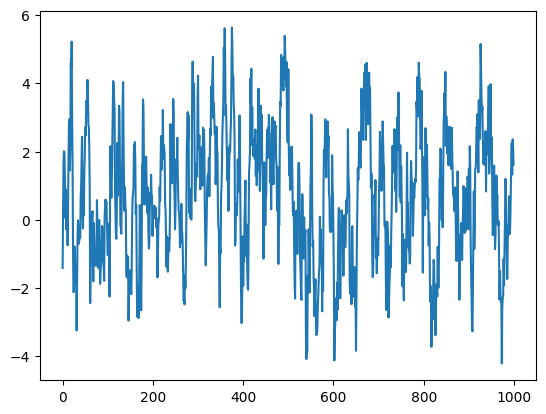

In [4]:
## Simulating an AR Process
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object= ArmaProcess(ar,ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

### Estimating an AR model

- Statsmodels has another module for estimating the parameters of a given AR model.

     from statsmodels.tsa.arima.model import ARIMA

*instatiating the class

     mod = ARIMA(data, order =(1,0,0)) 

*Estimating the model

     result = mod.fit()

- For ARIMA, order =(p,d,q)
- (1,0,0) means you're fitting the data to an AR(1) model.
- (2,0,0) would mean you're fitting the data to an AR(2) model.
- The middle number, d, relates to whether you take first differences of the data to make the time series stationary, like you would do with a random walk.
- q is the MA part. 


*To see full output
     
      print(result.summary())

*To see the parameters only -> returns mu and phi

      print(result.params)        

### Forecasting with an AR model

     from statsmodels.graphics.tsaplots import plot_predict

     fig,ax = plt.subplots()

     data.plot(ax=ax)

     plot_predict(result,start = '2012-09-27',end = '2012-10-06',alpha = 0.05,ax=ax) 

 *First arguement is the result of the fitted model. 

 *starting and ending data points for forecasting.

 *The alpha argument sets the darkness of the shaded confidence interval region, and if you don't want a confidence interval at all, set alpha equal to None.
 
 *ax=ax, so that the data and the predictions are on the same axes
 
      plt.show()


- Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!

### Choosing the right model

-  Ordinarily not be told the order of the model that you're trying to estimate.
- There are two techniques that can help determine the order of the AR model:    
     * The Partial Autocorrelation Function
     * Information Criteria.



#### PACF

- Measures the incremental benefit of adding another lag.
-  Imagine running several regressions, where you regress returns on more and more lagged values.
- The coefficient in the red box, phi 4-4, is the lag-4 value of the Partial Autocorrelation Function, and it represents how significant adding a fourth lag is when you already have three lags.

In [5]:
#Importing required library
from statsmodels.graphics.tsaplots import plot_pacf

     plot_pacf(x,lags=20,alpha=0.85)

##### Comparison of PACF for different AR Models

- For an AR(1) model, only the lag-*1* PACF is significantly different from zero. 
- For an AR(2) model, two lags are different from zero,
- For and AR(3), three lags are different from zero. 
- For White Noise, there are no lags that are significantly different from zero.

#### Information Criteria 

- The more parameters in a model, the better the model will fit the data, but this can lead to overfitting of the data. 
- The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. 
-  Two common adjusted goodness-of-fit measures are called :
     * Akaike Information Criterion -> result.aic
     * Bayesian Information Criterion. -> result.bic

-  In practice, the way to use the Bayesian information criterion is to fit several models, each with a different number of parameters, and choose the one with the lowest information criterion.
-      

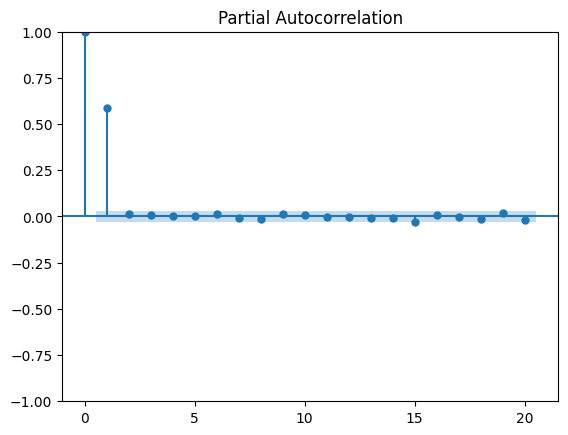

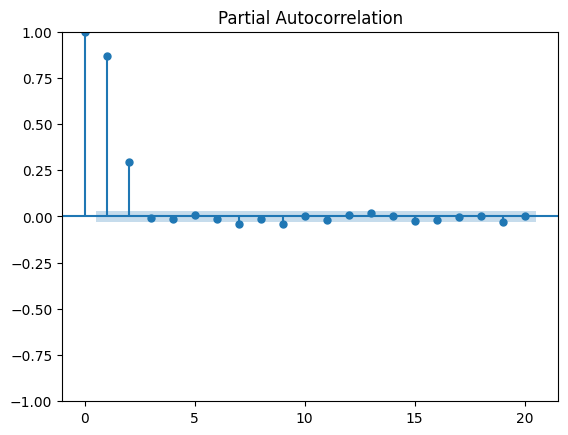

In [6]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### Moving Average Model

- MA is ;today's value equals a mean plus noise, plus a fraction theta of yesterday's noise.
     * R_t = mean + noise(E_t) + theta * yesterday's noise(E_t-1)

- Only one lagged error on the right hand side, this is called an MA model of order 1, MA(1).
- If the MA parameter, theta, is zero, then the process is white noise.
- MA models are stationary for all values of theta.

##### Interpretation of MA(1) parameter

- R_t is a time series of stock returns.
- If theta is negative, then a positive shock last period, represented by epsilon t-1, would have caused last period's return to be positive, but this period's return is more likely to be negative.
- A shock two periods ago would have no effect on today's return - only the shock now and last period. 
- Note that the lag-1 autocorrelation turns out not to be theta, but theta over 1 plus theta squared.

##### Comparison of MA(1) ACF

- In each case, there is zero autocorrelation for an MA(1) beyond lag-1.(theta =0.9,-0.9,0.5,-0.5)
- When theta is positive, the lag-1 autocorrelation is positive and when theta is negative, the lag-1 autocorrelation is negative.


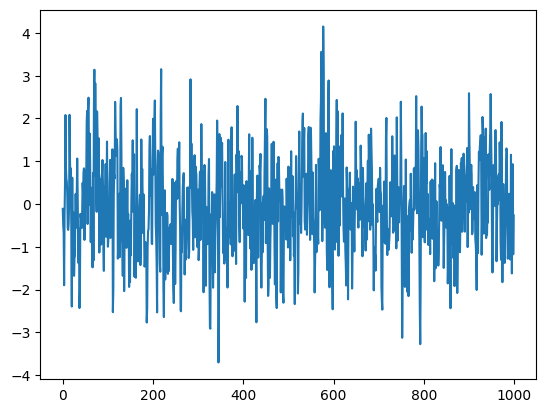

In [7]:
# Simulating an MA process
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1,0.5]) # contain 1 and MA parameter theta, you don't need to reverse the sign of theta
#instatiating a class
AR_object = ArmaProcess(ar,ma)
#simulating data
simulated_data= AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [10]:
simulated_data

array([-1.12394224e-01, -4.92899243e-01, -6.80705098e-01, -1.89907079e+00,
       -2.68947881e-01,  5.25809875e-01,  2.08033372e+00,  8.68185316e-01,
        5.87422450e-01,  5.18942955e-01,  2.20037288e-01, -5.50126694e-01,
       -6.04416192e-01, -4.66784539e-01, -6.35004527e-02,  2.08548499e+00,
        1.03101967e+00,  4.88679155e-01,  8.32113478e-01, -6.48726686e-01,
       -2.39674560e+00,  6.14885801e-01, -7.70858684e-01, -1.08874164e+00,
       -1.99981749e-01, -1.67915110e+00, -1.26066667e+00, -1.21752424e+00,
        2.23230544e-01,  2.38127678e-01, -5.52244095e-01,  3.21766035e-01,
        1.06310695e+00,  2.62836642e-01, -8.26631733e-01, -1.38184383e+00,
       -5.77600172e-01, -2.43177559e+00, -1.96193819e+00, -2.29504278e-01,
       -3.14115655e-01, -2.98189438e-01, -5.62293993e-01, -1.72227953e-01,
        4.92716299e-01,  2.43740180e-01,  7.32374095e-01,  8.34108053e-01,
       -8.39193735e-01, -3.13962211e-01,  8.50874703e-02,  7.86825693e-01,
        6.39426389e-01,  

##### Estimation of an MA model

- Same as estimating an AR model except order = 0,0,1

In [8]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data,order=(0,0,1))
results = mod.fit()

##### Forecasting an MA model

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

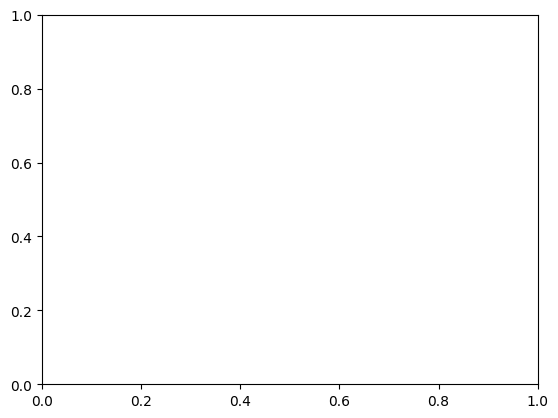

In [9]:
from statsmodels.graphics.tsaplots import plot_predict
import numpy as np 
fig,ax = plt.subplots()
simulated_data.plot(ax=ax) # data and prediction to be on the same axis
plot_predict(results,start ='2012-09-27',end = '2012-10-06',ax=ax) #result from the fitted model
plt.show()

#### ARMA Models

- Is a combination of an AR and MA models.
- ARMA(1,1):
     * R_t = mean + phi * R_t-1 + e_t + theta * e_t-1
- ARMA models can be converted to pure AR or pure MA models. 
-      

#### Cointergration Models

- The idea of cointergration is that even if the prices of two different assets both follow random walks, it is still possible that a linear combination of them is not a random walk. 
- If that's true, then even though P and Q are not forecastable because they're random walks, the linear combination is forecastable, and we say that P and Q are cointegrated.

- Both Heating Oil prices and Natural Gas prices look like they're random walks. But when you look at the spread, or difference between them, the series looks like it's mean reverting.

- Types of series that are cointergrated:
     * For stocks, a natural starting point for identifying cointegrated pairs are stocks in the same industry.
     * Economic substitutes
     * Competitors 

##### Testing for Cointergration

- Regress the level of one series on the level of the other series, to get the slope coefficient c.
- Then, you run the Augmented Dickey-Fuller test, the test for a random walk that you learned about in the second chapter, on the linear combination of the two series.
- Alternatively, statsmodels has a function coint that combines both steps.
     *from statsmodels.tsa.stattools import coint
     coint(P,Q)

### CASE STUDY: CLIMATE CHANGE

- Temperature data:
     * New york City from 1870-2016
- Convert index to datetime object.
- Plot data
- Dickey-Fuller test: whether data is a random walk
- Take first differences of the data to transform it into a stationary series.
- Compute the Autocorrelation Function and the Partial Autocorrelation Function of the data.
- Fit an AR,MA and ARMA models.
- Use the Information Criterion to choose the best model.
- Forecast temperatures over the next 30 years.   
